In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

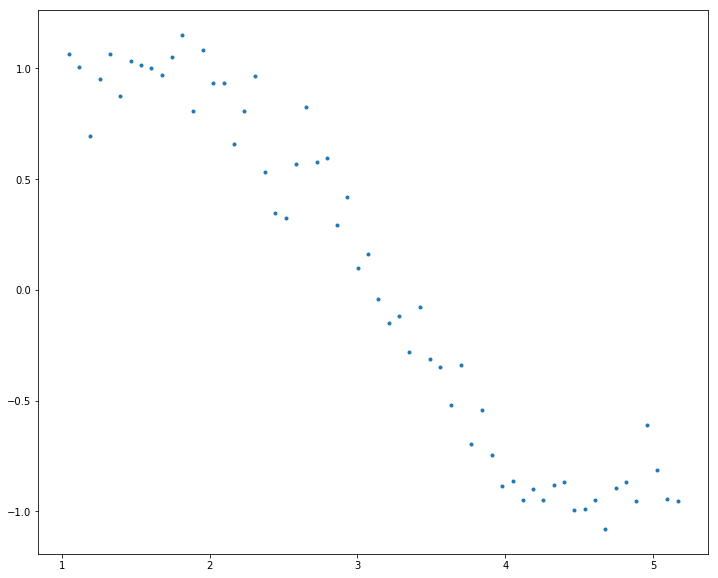

In [2]:
#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

In [3]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

In [4]:
# Import Lasso regression from scikit-learn
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
        
    # Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors], data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    # Check if a plot is to be made for the entered power
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    # Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend([lassoreg.coef_])
    return ret

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


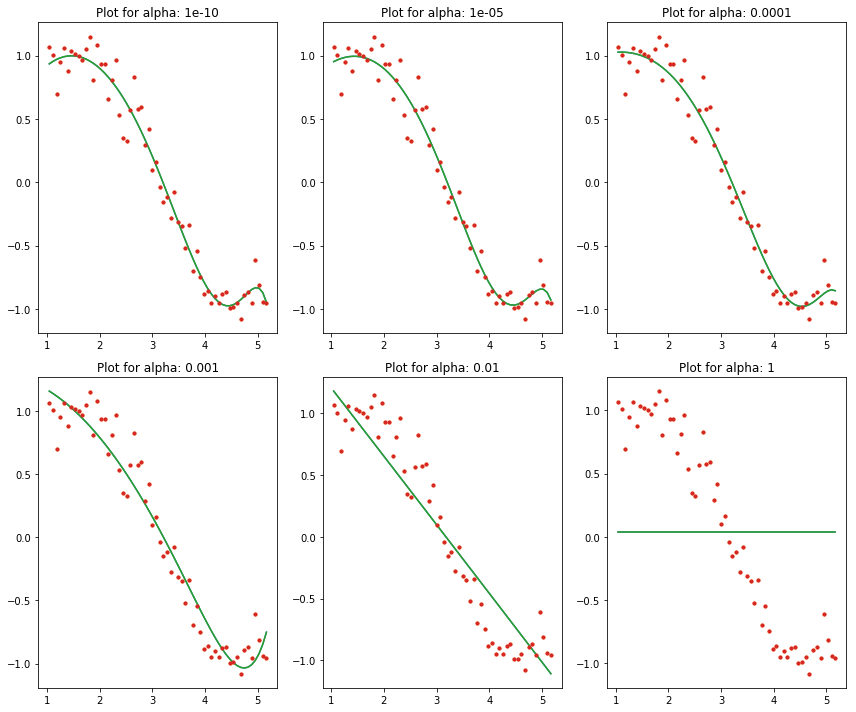

In [5]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    #coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)
    coef_matrix_lasso.iloc[i,0:2] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot=models_to_plot)[0:2]
    coef_matrix_lasso.iloc[i,2:] = np.array(lasso_regression(data, predictors, alpha_lasso[i], models_to_plot=models_to_plot)[2:])

In [6]:
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.956715,0.222238,1.06464,-0.369048,0.000885176,0.00163313,-0.000118539,-6.43874e-05,-6.27554e-06,1.44874e-06,7.82079e-07,2.0758e-07,3.98135e-08,5.35996e-09,1.81973e-10,-1.9545e-10,-9.23654e-11
alpha_1e-10,0.956715,0.222239,1.06463,-0.369044,0.000884005,0.00163297,-0.000118453,-6.43884e-05,-6.27604e-06,1.44856e-06,7.82087e-07,2.07577e-07,3.98123e-08,5.35972e-09,1.82126e-10,-1.95439e-10,-9.23689e-11
alpha_1e-08,0.956708,0.222374,1.06416,-0.368607,0.000768994,0.00161624,-0.000109896,-6.44771e-05,-6.32441e-06,1.43063e-06,7.83012e-07,2.07335e-07,3.96964e-08,5.33557e-09,1.96e-10,-1.94185e-10,-9.2727e-11
alpha_1e-05,0.961296,0.50422,0.604311,-0.12811,-0.0382162,-0,0,0,0,7.72717e-06,1.00329e-06,7.72549e-08,0,0,0,-0,-6.95047e-11
alpha_0.0001,1.03263,0.903041,0.1711,-0,-0.0477801,-0,-0,0,0,9.46534e-06,5.09953e-07,0,0,0,-0,-0,-4.40439e-11
alpha_0.001,1.67883,1.29462,-0,-0.126087,-0,-0,-0,0,0,0,0,0,1.49606e-08,7.52631e-10,0,0,0
alpha_0.01,3.63907,1.75938,-0.552066,-0.000562323,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0
alpha_1,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


In [7]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      8
alpha_0.0001    10
alpha_0.001     12
alpha_0.01      13
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64